In [54]:
import pandas as pd
import geopandas as gpd
import datetime
import numpy as np
from shapely.geometry import Point, LineString

In [2]:
#phone info
f = open('track.txt','r')
phone = f.readline()
print 'phone info:',phone
f.close()



phone info: motorola Moto G (4);7.0;1.1.6;2.0.4;video



In [3]:
#read original data from file within track.txt.gz used by OSC to store sensor data
data = pd.read_csv('track.txt',sep=';',
                   skiprows=[0],
                   skipfooter=1,
                   usecols=[0,1,2,3,4,5,9,10,11,16,17,18],
                   header=None,
                   engine = 'python')

#naming of columns 
names = ['timestamp','long','lat','elevation','horizontal_accu',
         'GPSspeed','accelerationX','accelerationY','accelerationZ',
         'gravityX','gravityY','gravityZ'
        ]

data.columns=names

data.head()


,timestamp,long,lat,elevation,horizontal_accu,GPSspeed,accelerationX,accelerationY,accelerationZ,gravityX,gravityY,gravityZ
0,1.492177e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.492177e+09,NaN,NaN,NaN,NaN,NaN,-0.469606,0.126763,-0.394292,NaN,NaN,NaN
2,1.492177e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.492177e+09,NaN,NaN,NaN,NaN,NaN,-0.469606,0.126763,-0.394292,NaN,NaN,NaN
4,1.492177e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205934,0.19355,0.959234


In [4]:
#conversion into timestamp
dates = []
for i in range(data.shape[0]):
    try:
        dates.append(datetime.datetime.fromtimestamp(data['timestamp'].iloc[i]))
    except :
        print 'Error with row:', i
data['timestamp'] = dates        
data.head()

,timestamp,long,lat,elevation,horizontal_accu,GPSspeed,accelerationX,accelerationY,accelerationZ,gravityX,gravityY,gravityZ
0,2017-04-14 09:35:19.833742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-14 09:35:19.833626,NaN,NaN,NaN,NaN,NaN,-0.469606,0.126763,-0.394292,NaN,NaN,NaN
2,2017-04-14 09:35:19.843359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-14 09:35:19.843273,NaN,NaN,NaN,NaN,NaN,-0.469606,0.126763,-0.394292,NaN,NaN,NaN
4,2017-04-14 09:35:19.843216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205934,0.19355,0.959234


In [5]:
#remove all empty rows excepto timestamp
emtpy = data.iloc[:,1:].isnull().sum(axis=1) == data.shape[1]-1
data = data.loc[~emtpy,:]
data.index=range(data.shape[0])

data.head()

,timestamp,long,lat,elevation,horizontal_accu,GPSspeed,accelerationX,accelerationY,accelerationZ,gravityX,gravityY,gravityZ
1,2017-04-14 09:35:19.833626,NaN,NaN,NaN,NaN,NaN,-0.469606,0.126763,-0.394292,NaN,NaN,NaN
3,2017-04-14 09:35:19.843273,NaN,NaN,NaN,NaN,NaN,-0.469606,0.126763,-0.394292,NaN,NaN,NaN
4,2017-04-14 09:35:19.843216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205934,0.19355,0.959234
6,2017-04-14 09:35:19.853097,NaN,NaN,NaN,NaN,NaN,-0.469606,0.126763,-0.394292,NaN,NaN,NaN
7,2017-04-14 09:35:19.853047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205934,0.19355,0.959234


In [56]:
#short sample of data with gps data in teh extremes
#data from 49 to 451 with 250 in the middle
#choose long lat and acc data
dataClip = data.loc[49:451,['long','lat','accelerationX','accelerationY','accelerationZ']]
data[data['long'].isnull() == False].head()

,timestamp,long,lat,elevation,horizontal_accu,GPSspeed,accelerationX,accelerationY,accelerationZ,gravityX,gravityY,gravityZ
49,2017-04-14 09:35:20.798094,-73.971799,40.643469,-21.0,15.170,2.34,NaN,NaN,NaN,NaN,NaN,NaN
250,2017-04-14 09:35:21.820354,-73.971850,40.643462,-20.0,12.136,2.37,NaN,NaN,NaN,NaN,NaN,NaN
451,2017-04-14 09:35:22.788859,-73.971901,40.643456,-22.0,13.653,3.26,NaN,NaN,NaN,NaN,NaN,NaN
656,2017-04-14 09:35:23.821521,-73.971952,40.643454,-20.0,16.687,3.17,NaN,NaN,NaN,NaN,NaN,NaN
857,2017-04-14 09:35:24.801281,-73.972003,40.643454,-21.0,16.687,3.32,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#calcular la distancia euclidiana

dataClip.dropna(axis=0,how='all',inplace=True)

dataClip.to_csv('testcase.csv',index_label=False)
dataClip.head()

,long,lat,accelerationX,accelerationY,accelerationZ
49,-73.971799,40.643469,NaN,NaN,NaN
50,NaN,NaN,-0.336876,0.083558,0.261692
52,NaN,NaN,-0.640812,0.265264,0.193743
54,NaN,NaN,-0.640812,0.265264,0.193743
56,NaN,NaN,-0.640812,0.265264,0.193743


## As vectors

$ (x_1^2 + y_1^2 +z_1^2) + (x_2^2 + y_2^2 +z_2^2) ... (x_n^2 + y_n^2 +z_n^2)$

In [42]:
#Tryng to use groupby coordinates
dataClip['sumXYZ'] = dataClip.accelerationX**2 +  dataClip.accelerationY**2 + dataClip.accelerationZ**2
#fill nas with the previous
#dataClip['long'] = dataClip['long'].fillna(method='ffill')
#dataClip['lat'] = dataClip['lat'].fillna(method='ffill')
dataClip.head()

,long,lat,accelerationX,accelerationY,accelerationZ,sumXYZ
49,-73.971799,40.643469,NaN,NaN,NaN,NaN
50,NaN,NaN,-0.336876,0.083558,0.261692,0.188950
52,NaN,NaN,-0.640812,0.265264,0.193743,0.518542
54,NaN,NaN,-0.640812,0.265264,0.193743,0.518542
56,NaN,NaN,-0.640812,0.265264,0.193743,0.518542


In [61]:
#change this later to the number of coords
#generar un indice para las celdas que esten con coords
coords = 3
[i for i in range(coords) if ~(data['long'].isnull())]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [47]:

dataClip.head()

,long,lat,accelerationX,accelerationY,accelerationZ,sumXYZ
49,-73.971799,40.643469,NaN,NaN,NaN,NaN
50,-73.971799,40.643469,-0.336876,0.083558,0.261692,0.188950
52,-73.971799,40.643469,-0.640812,0.265264,0.193743,0.518542
54,-73.971799,40.643469,-0.640812,0.265264,0.193743,0.518542
56,-73.971799,40.643469,-0.640812,0.265264,0.193743,0.518542


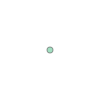

In [30]:
punto1 = Point(dataClip['long'].loc[49], dataClip['lat'].loc[49])
punto2 = Point(dataClip['long'].loc[250], dataClip['lat'].loc[250])
punto2

In [31]:
LineString([punto1,punto2]).wkt

'LINESTRING (-73.97179916 40.64346946, -73.97184982 40.64346192)'